In [1]:
import cv2

import numpy as np
import pylab as plt
import matplotlib as mpl
import tifffile as tiff
import os

%load_ext autoreload
%autoreload 2

%matplotlib notebook

In [2]:
def std_scaler(my_data):
    mean = np.mean(my_data)
    std = np.std(my_data)
    return (my_data - mean)/std

In [3]:
dir_path = './data'
filenames = os.listdir(dir_path)

In [4]:
data = tiff.imread(os.path.join(dir_path, filenames[0]))

In [5]:
data_scaled = std_scaler(data)

<IPython.core.display.Javascript object>


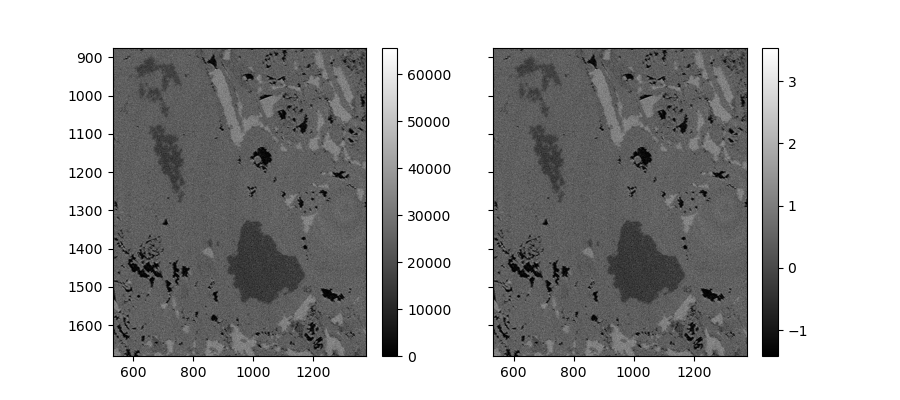

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharex=True, sharey=True)

im = axs[0].imshow(data, aspect='auto', cmap='gray')
plt.colorbar(im, ax=axs[0])

im = axs[1].imshow(data_scaled, aspect='auto', cmap='gray')
plt.colorbar(im, ax=axs[1])

In [8]:
# Blur the image for better edge detection
data_blur = cv2.GaussianBlur(data_scaled, (3,3), 0)

<IPython.core.display.Javascript object>


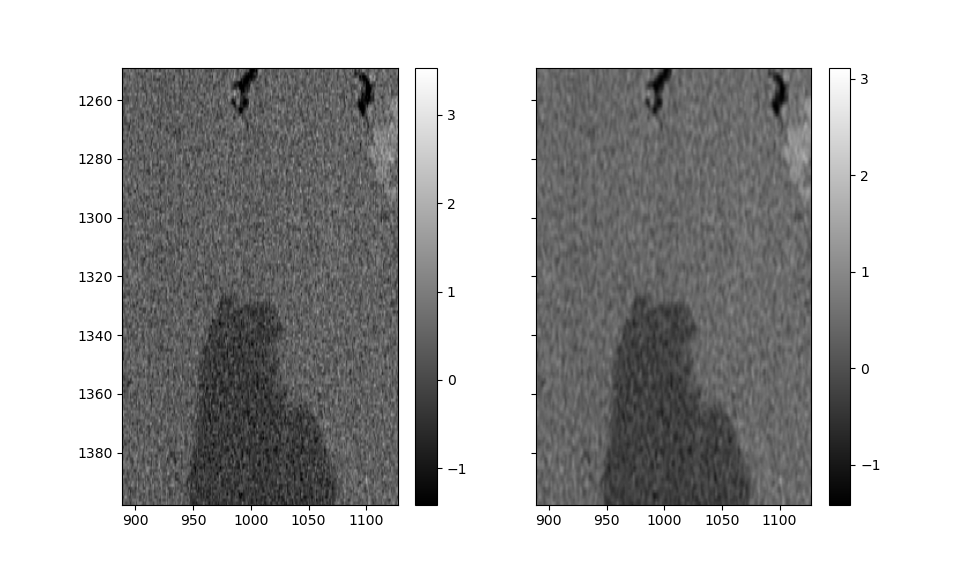

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharex=True, sharey=True)

im = axs[0].imshow(data_scaled, aspect='auto', cmap='gray')
plt.colorbar(im, ax=axs[0])

im = axs[1].imshow(data_blur, aspect='auto', cmap='gray')
plt.colorbar(im, ax=axs[1])

In [10]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=data_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=data_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=data_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

<IPython.core.display.Javascript object>


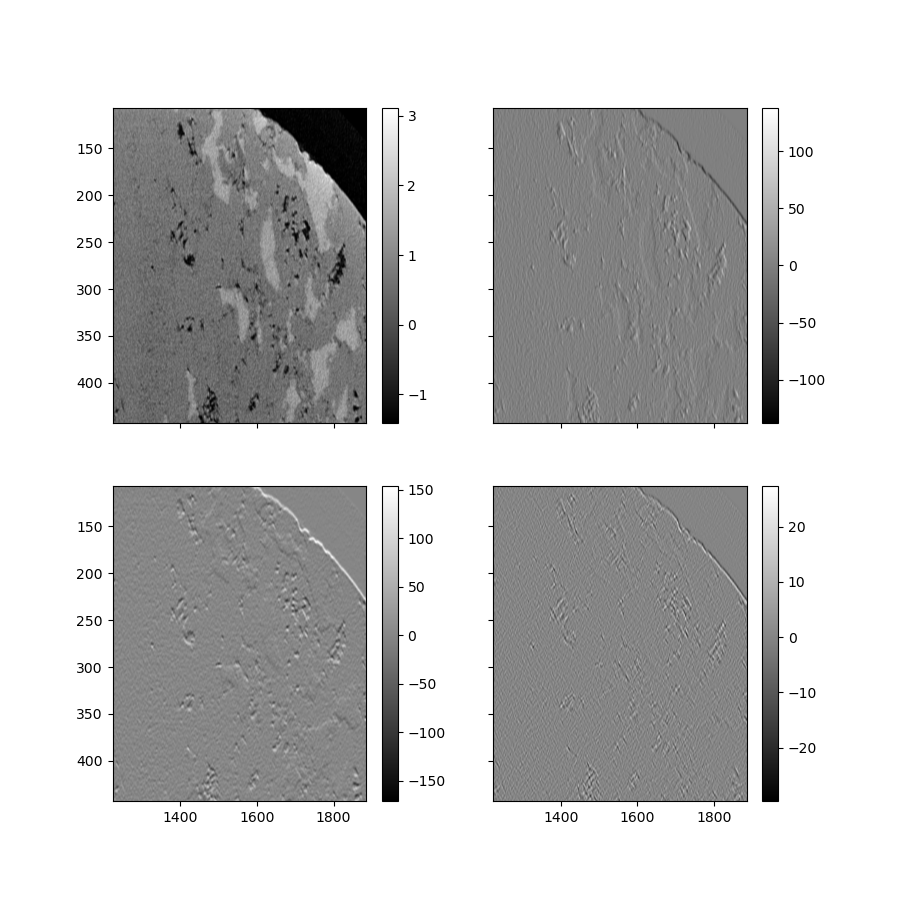

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 9), sharex=True, sharey=True)

im = axs[0,0].imshow(data_blur, aspect='auto', cmap='gray')
plt.colorbar(im, ax=axs[0,0])

im = axs[0,1].imshow(sobelx, aspect='auto', cmap='gray')
plt.colorbar(im, ax=axs[0,1])

im = axs[1,0].imshow(sobely, aspect='auto', cmap='gray')
plt.colorbar(im, ax=axs[1,0])

im = axs[1,1].imshow(sobelxy, aspect='auto', cmap='gray')
plt.colorbar(im, ax=axs[1,1])